Identify trends in genre over time

In [20]:
# import libraries
from datetime import datetime
from datetime import date
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# local directory
anime_data = 'anime.csv'
time_data  = 'C:\\Users\\Uri\\Desktop\\data\\start_dates.csv'

# read & import data into pandas data frames
anime_df = pd.read_csv(anime_data)
# time_df  = pd.read_csv(time_data)

# drop data:
anime_df.drop('status',
              axis=1, inplace=True)

# convert data types to save memory
# time_df.anime_id = time_df.anime_id.astype('int32')
# time_df.my_score = time_df.my_score.astype('int16')
# time_df.year_watched = time_df.year_watched.astype('int16')
anime_df.anime_id = anime_df.anime_id.astype('int32')

# make a list of all possible genres
anime_df['genre'] = anime_df.genre.str.split(',')

my_genres = []
for column in anime_df[['genre']]:
    column_obj = anime_df[column]
    for genre_list in column_obj.values:
        for genre in genre_list:
            my_genres.append(genre.strip())
genre_set = set(my_genres)
my_genres = list(genre_set)        # there is a total of 40 genres

# set the first genre listed as the 'main genre'
anime_df.loc[:, 'single_genre'] = anime_df.genre.map(lambda x: x[0])
anime_df.drop('genre', axis=1, inplace=True)
anime_df.rename(columns={'single_genre': 'genre'}, inplace=True)

# set the year of each anime to the year that it was premiered
anime_df['aired_string'] = anime_df.aired_string.str.split('to')
anime_df.loc[:, 'aired_string'] = anime_df.aired_string.map(lambda x: x[0].strip())
anime_df['aired_string'] = pd.to_datetime(anime_df['aired_string'], errors='coerce')
anime_df['aired_string'] = anime_df['aired_string'].dt.year
anime_df.rename(columns={'aired_string': 'year'}, inplace=True)

# change popularity magnitude
#year_genre_df['popularity'] = year_genre_df['popularity'].apply(lambda x: x*-1)
anime_df.loc[:,'popularity'] *= -1/1000
anime_df.loc[:,'rank'] *= -1/1000

# obtain top 10 genres
anime_df.members = anime_df.members.astype('int32')
anime_grouped_df = anime_df.groupby('genre')
top_df = anime_grouped_df['anime_id'].count().reset_index()
top_df.sort_values('anime_id', ascending=False, inplace=True)
top_genres_df = top_df.head(n=10)

# filter out genres that are not in the top 10
top_genres = []
for genre in top_genres_df['genre']:
    top_genres.append(genre)
anime_df['target'] = anime_df['genre'].apply(lambda genre: True if genre in top_genres else False)
target_anime_df = anime_df[anime_df['target'] == True]

# determine the best range of years to analyze
year_genre_df = target_anime_df.groupby(['year', 'genre'])
year_df = target_anime_df.groupby('year')
x = year_df['anime_id'].count()
# print(x.to_string())        # triple digits appear at 1986...

year_filter_df = target_anime_df[(target_anime_df['year'] >= 1997)]
year_genre_df = year_filter_df.groupby(['year', 'genre'])

# time_df.info()
# anime_df.info()
# time_df.head(20)
anime_df.head(20)
# anime_grouped_df.head(20)
# top_df.head(20)
# top_genres_df.head(20)
# target_anime_df.head(20)


,anime_id,title,year,score,scored_by,rank,popularity,members,genre,target
0,11013,Inu x Boku SS,2012,7.63,139250.0,-1.274,-0.231,283882,Comedy,True
1,2104,Seto no Hanayome,2007,7.89,91206.0,-0.727,-0.366,204003,Comedy,True
2,5262,Shugo Chara!! Doki,2008,7.55,37129.0,-1.508,-1.173,70127,Comedy,True
3,721,Princess Tutu,2002,8.21,36501.0,-0.307,-0.916,93312,Comedy,True
4,12365,Bakuman. 3rd Season,2012,8.67,107767.0,-0.050,-0.426,182765,Comedy,True
5,6586,Yume-iro Pâtissière,2009,8.03,21618.0,-0.526,-1.630,45625,Kids,True
6,178,Ultra Maniac,2003,7.26,9663.0,-2.594,-2.490,22778,Magic,False
7,2787,Shakugan no Shana II (Second),2007,7.72,126085.0,-1.066,-0.332,220591,Action,True
8,4477,Nodame Cantabile: Paris-hen,2008,8.24,53908.0,-0.281,-0.988,85660,Music,True
9,853,Ouran Koukou Host Club,2006,8.34,335137.0,-0.205,-0.069,538843,Comedy,True


<ipython-input-21-d49545cded4a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 20)


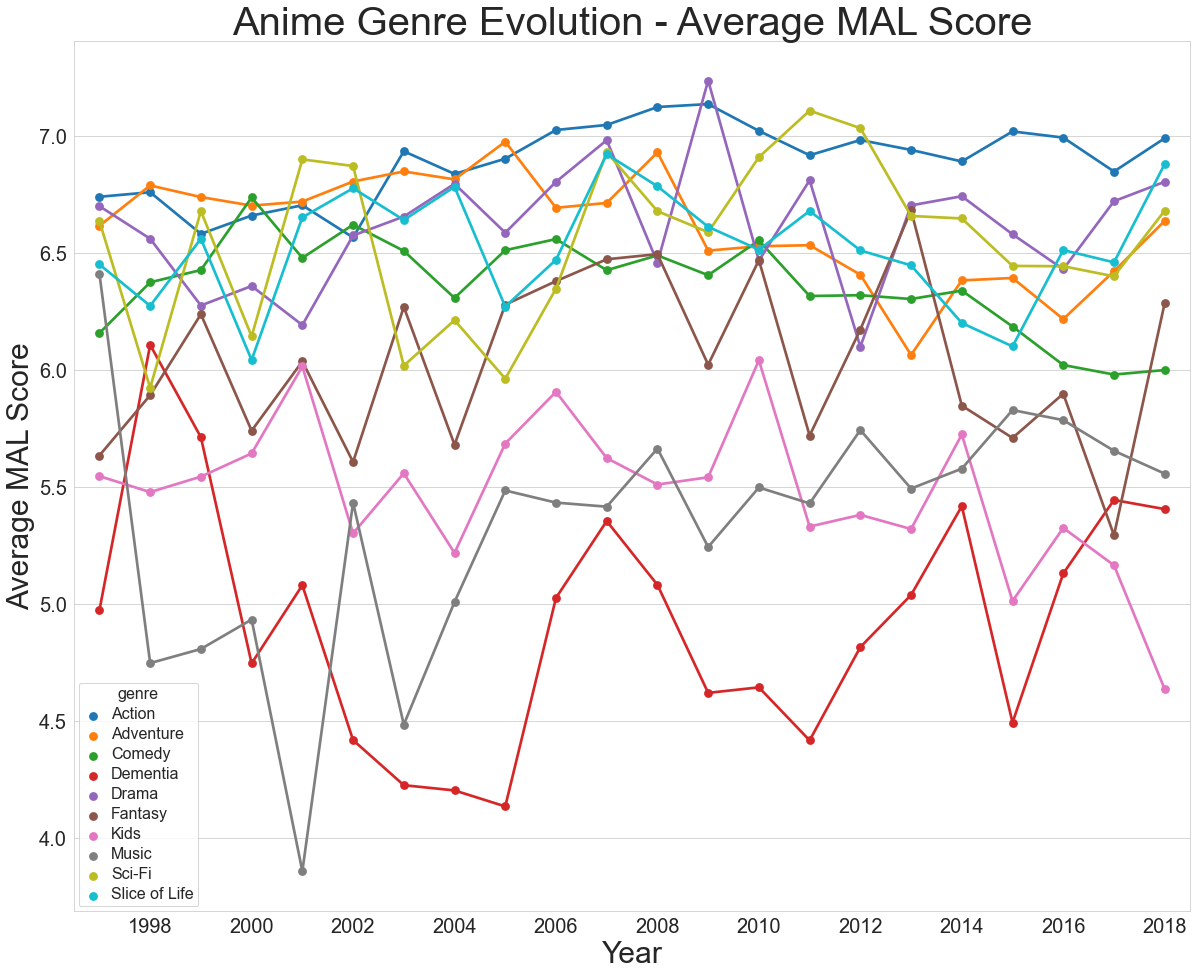

In [21]:
# plot against score
fig, ax = plt.subplots()
fig.set_size_inches(20, 16)
b = sns.pointplot(x='year', y='score', data=year_genre_df['score'].mean().reset_index(), hue='genre', ax=ax)
b.axes.set_title("Anime Genre Evolution - Average MAL Score", fontsize=40)
b.set_xlabel("Year",fontsize=30)
b.set_ylabel("Average MAL Score",fontsize=30)
b.set_yticklabels(b.get_yticks(), size = 20)
_, xlabels = plt.xticks()
b.set_xticklabels(xlabels, size=20)
sns.set_style('whitegrid')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title
plt.setp(ax.get_xticklabels()[::2], visible=False)

score = b.get_figure()
score.savefig('score.png')

<ipython-input-16-306f7035a8ed>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 20)


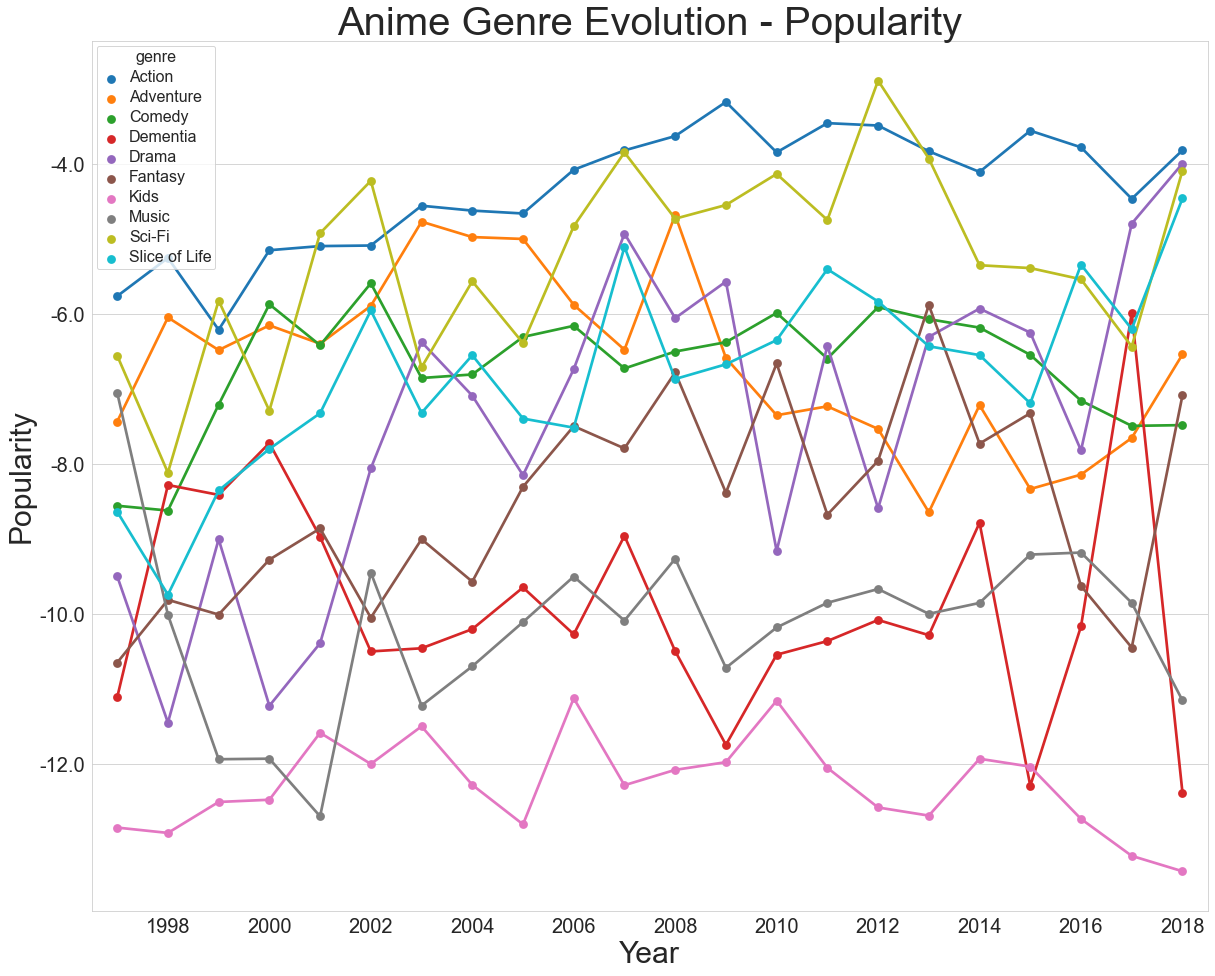

In [16]:
# plot against popularity
fig, ax = plt.subplots()
fig.set_size_inches(20, 16)
b = sns.pointplot(x='year', y='popularity', data=year_genre_df['popularity'].mean().reset_index(), hue='genre', ax=ax)
b.axes.set_title("Anime Genre Evolution - Popularity", fontsize=40)
b.set_xlabel("Year",fontsize=30)
b.set_ylabel("Popularity",fontsize=30)
b.set_yticklabels(b.get_yticks(), size = 20)
b.set_xticklabels(xlabels, size=20)
sns.set_style('whitegrid')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title
plt.setp(ax.get_xticklabels()[::2], visible=False)

pop = b.get_figure()
pop.savefig('pop.png')

<ipython-input-17-2f25a672085d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 20)


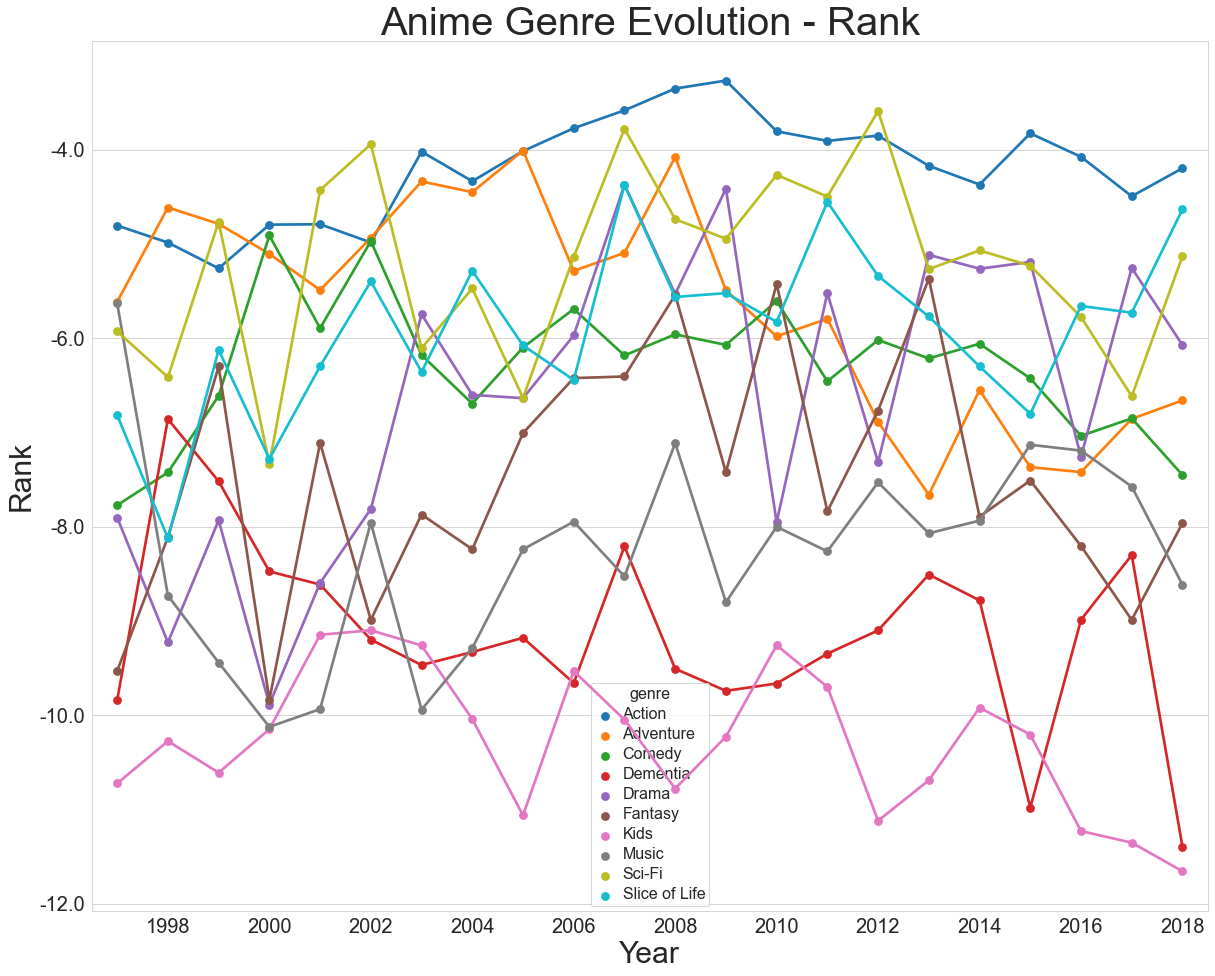

In [17]:
# plot against rank
fig, ax = plt.subplots()
fig.set_size_inches(20, 16)
b = sns.pointplot(x='year', y='rank', data=year_genre_df['rank'].mean().reset_index(), hue='genre', ax=ax)
b.axes.set_title("Anime Genre Evolution - Rank", fontsize=40)
b.set_xlabel("Year",fontsize=30)
b.set_ylabel("Rank",fontsize=30)
b.set_yticklabels(b.get_yticks(), size = 20)
b.set_xticklabels(xlabels, size=20)
sns.set_style('whitegrid')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title
plt.setp(ax.get_xticklabels()[::2], visible=False)

rank = b.get_figure()
rank.savefig('rank.png')

<ipython-input-18-eb6434bf2ff2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 20)


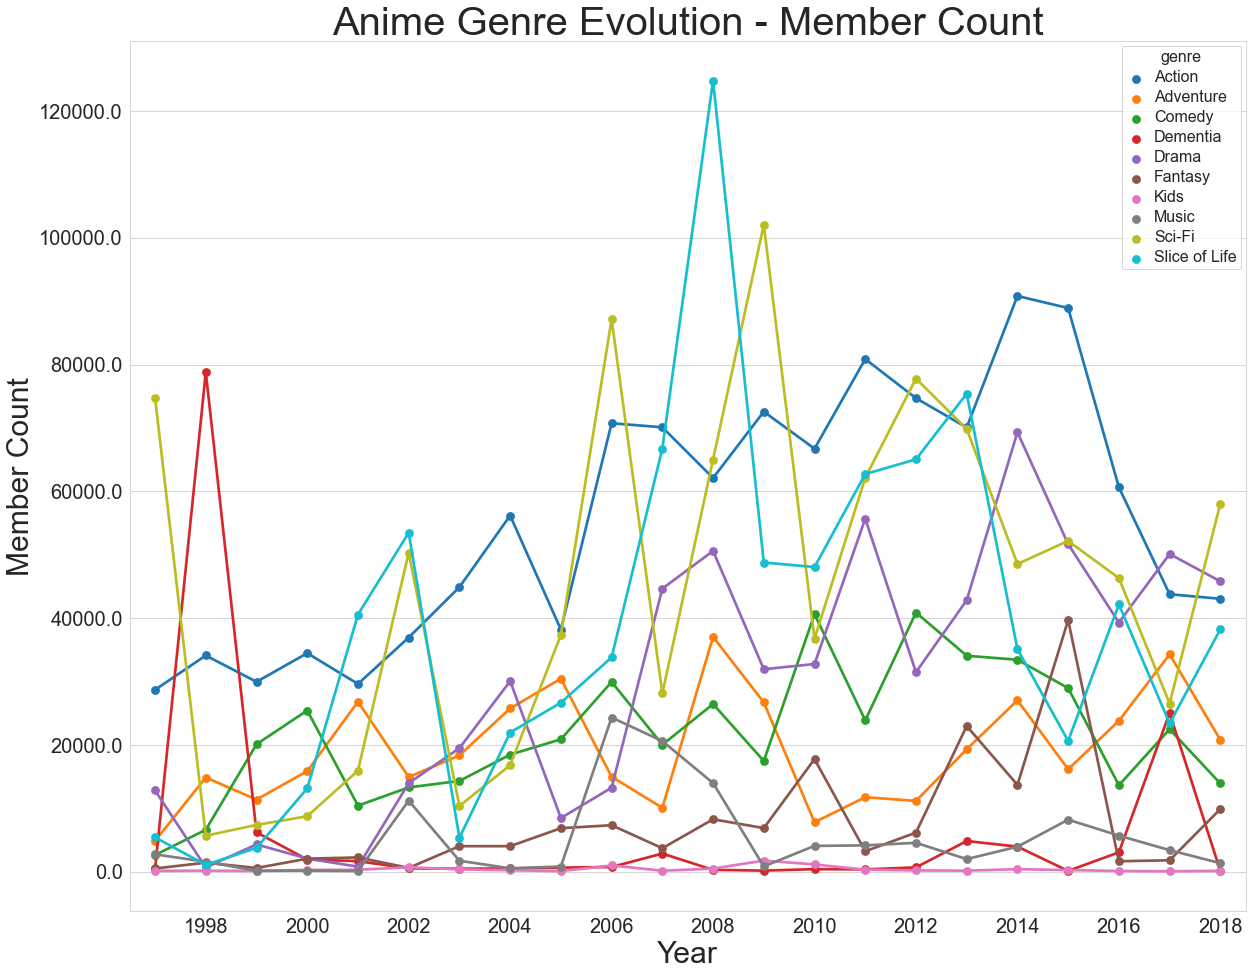

In [18]:
# plot against members
fig, ax = plt.subplots()
fig.set_size_inches(20, 16)
b = sns.pointplot(x='year', y='members', data=year_genre_df['members'].mean().reset_index(), hue='genre', ax=ax)
b.axes.set_title("Anime Genre Evolution - Member Count", fontsize=40)
b.set_xlabel("Year",fontsize=30)
b.set_ylabel("Member Count",fontsize=30)
b.set_yticklabels(b.get_yticks(), size = 20)
b.set_xticklabels(xlabels, size=20)
sns.set_style('whitegrid')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title
plt.setp(ax.get_xticklabels()[::2], visible=False)

mem = b.get_figure()
mem.savefig('mem.png')

<ipython-input-19-1a0f4b24b47b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 20)


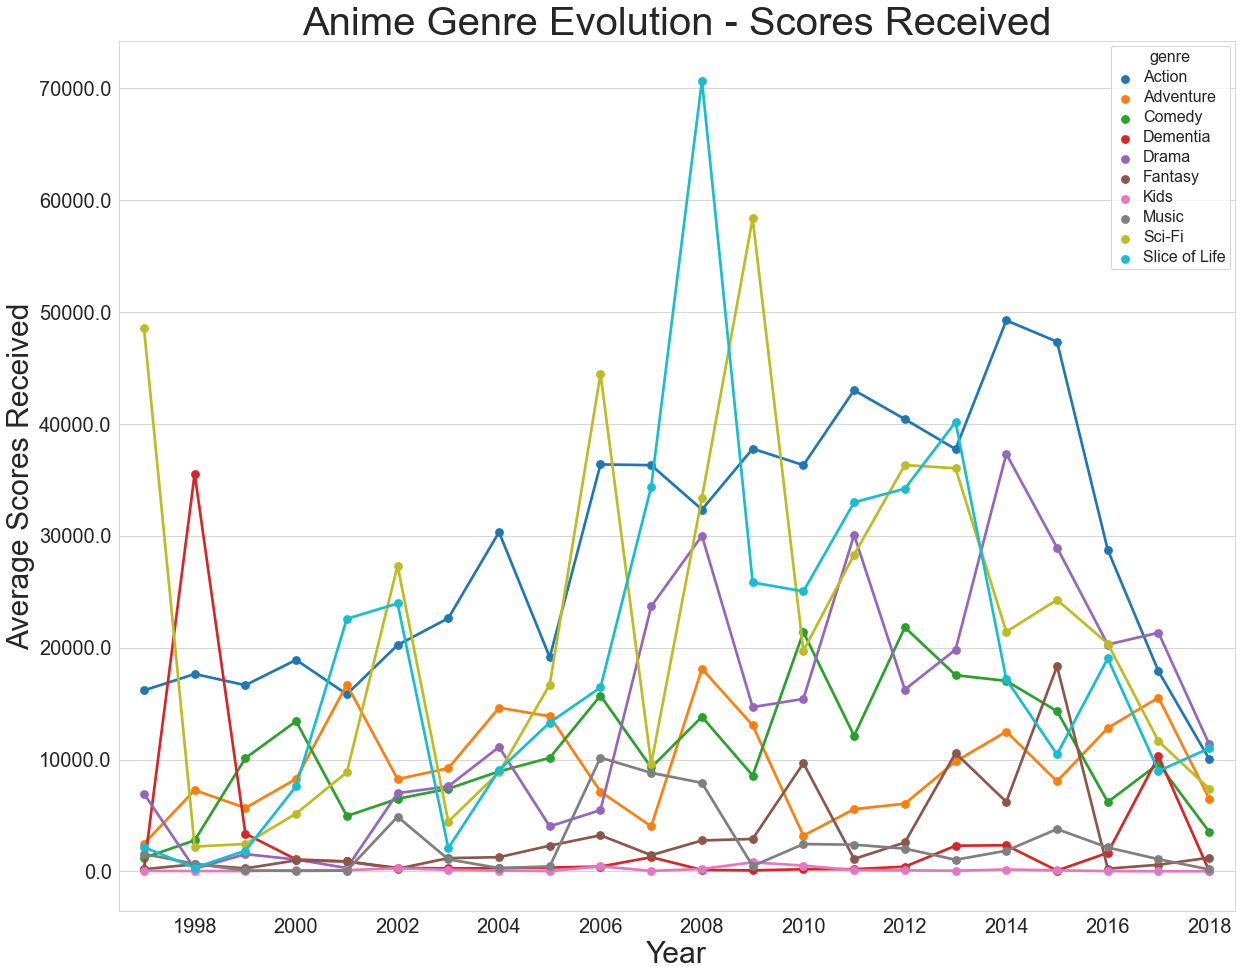

In [19]:
# plot against score received
fig, ax = plt.subplots()
fig.set_size_inches(20, 16)
b = sns.pointplot(x='year', y='scored_by', data=year_genre_df['scored_by'].mean().reset_index(), hue='genre', ax=ax)
b.axes.set_title("Anime Genre Evolution - Scores Received", fontsize=40)
b.set_xlabel("Year",fontsize=30)
b.set_ylabel("Average Scores Received",fontsize=30)
b.set_yticklabels(b.get_yticks(), size = 20)
b.set_xticklabels(xlabels, size=20)
sns.set_style('whitegrid')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title
plt.setp(ax.get_xticklabels()[::2], visible=False)

votes = b.get_figure()
votes.savefig('votes.png')